In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ADXL345_SensorData.csv to ADXL345_SensorData.csv


In [ ]:
import pandas as pd

df = pd.read_csv('ADXL345_SensorData.csv')
df.head()

,X-direction,Y-direction,Z-direction,Error_found
0,0.31,1.02,-9.18,no
1,-0.78,0.98,-9.10,no
2,0.04,0.67,-8.28,no
3,-0.04,0.90,-8.16,no
4,0.00,1.26,-7.77,no


In [ ]:
df.shape

(1082, 4)

In [ ]:
df.isnull().sum()

,0
X-direction,0
Y-direction,0
Z-direction,0
Error_found,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1082 entries, 0 to 1081
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   X-direction  1082 non-null   float64
 1   Y-direction  1082 non-null   float64
 2   Z-direction  1082 non-null   float64
 3   Error_found  1082 non-null   object 
dtypes: float64(3), object(1)
memory usage: 33.9+ KB


In [ ]:
df['ErrorA_Found']= df['Error_found'].map({'yes': 1, 'no': 0})

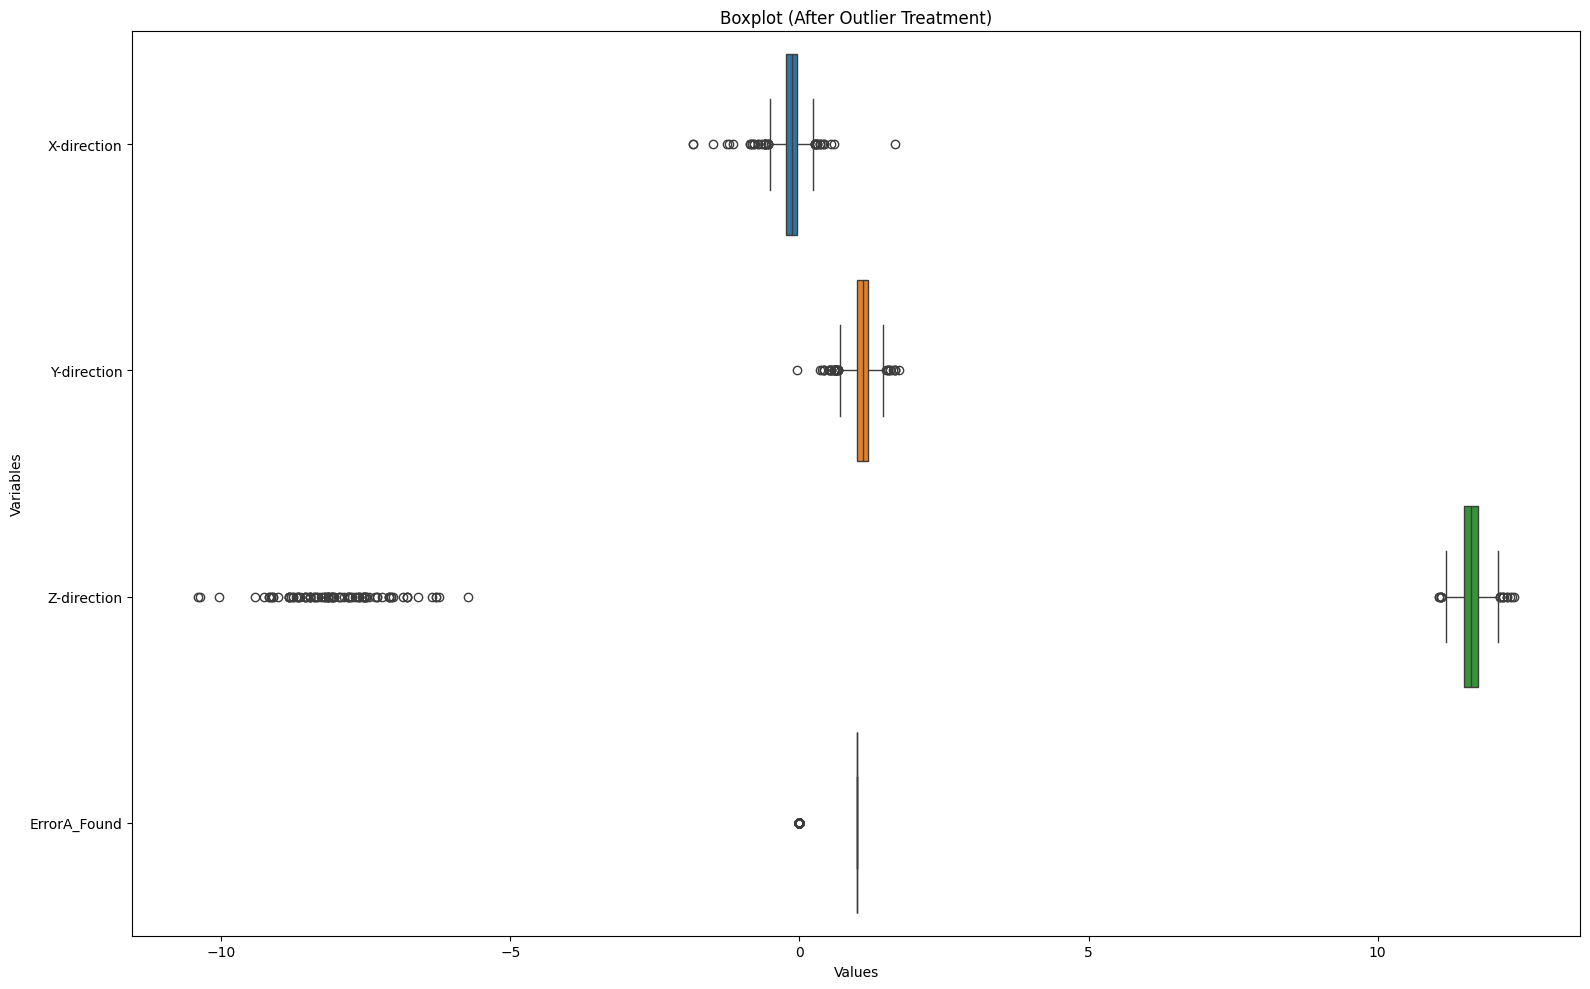

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter numeric columns only
numeric_df = df.select_dtypes(include='number')

# Increase figure size if too many features
plt.figure(figsize=(16, 10))

# Horizontal boxplot
sns.boxplot(data=numeric_df, orient='h')

plt.title("Boxplot (After Outlier Treatment)")
plt.xlabel("Values")
plt.ylabel("Variables")
plt.tight_layout()
plt.show()

In [ ]:
def replace_outliers_with_mean_percentile(df, lower_percentile=5, upper_percentile=95):
    for column in df.select_dtypes(include='number').columns:
        if column == 'ErrorA_Found' and df['ErrorA_Found'].isnull().any():
            continue

        lower_bound = np.percentile(df[column], lower_percentile)
        upper_bound = np.percentile(df[column], upper_percentile)

        outliers = (df[column] < lower_bound) | (df[column] > upper_bound)

        mean_value = df[column].mean()

        # Convert column to float to avoid dtype warning
        df[column] = df[column].astype(float)

        df.loc[outliers, column] = mean_value

    # Optional cleanup
    df['ErrorA_Found'] = pd.to_numeric(df['ErrorA_Found'], errors='coerce')

In [ ]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np

# Create dummy data to illustrate (replace with your actual X_train, Y_train)
# Let's create an X_train and Y_train that intentionally have only 2 samples
X_data = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]]) # 4 samples
Y_data = np.array([0, 1, 0, 1]) # 4 samples

# Split to get only 2 samples in training set for demonstration of the error
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.5, random_state=42)

print(f"Number of samples in X_train: {len(X_train)}") # This will print 2

rf = RandomForestClassifier()

param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}

# The fix: Reduce cv value
# Since len(X_train) is 2, cv must be <= 2
grid_rf = GridSearchCV(rf, param_grid_rf, cv=2) # Changed cv from 5 to 2

grid_rf.fit(X_train, Y_train)

print("GridSearchCV training complete!")
print(f"Best parameters: {grid_rf.best_params_}")
print(f"Best score: {grid_rf.best_score_}")

Number of samples in X_train: 2
GridSearchCV training complete!
Best parameters: {'max_depth': None, 'n_estimators': 50}
Best score: 1.0


MILESTONE 2

In [ ]:
df.describe()

,X-direction,Y-direction,Z-direction,ErrorA_Found
count,1082.000000,1082.000000,1082.000000,1082.000000
mean,-0.130176,1.087421,9.861155,0.769871
std,0.209577,0.174106,5.657546,0.421110
min,-1.840000,-0.040000,-10.400000,0.000000
25%,-0.240000,0.990000,11.490000,1.000000
50%,-0.120000,1.100000,11.610000,1.000000
75%,-0.040000,1.180000,11.730000,1.000000
max,1.650000,1.730000,12.360000,1.000000


In [ ]:
df['ErrorA_Found'].value_counts()

,count
ErrorA_Found,
1,833
0,249


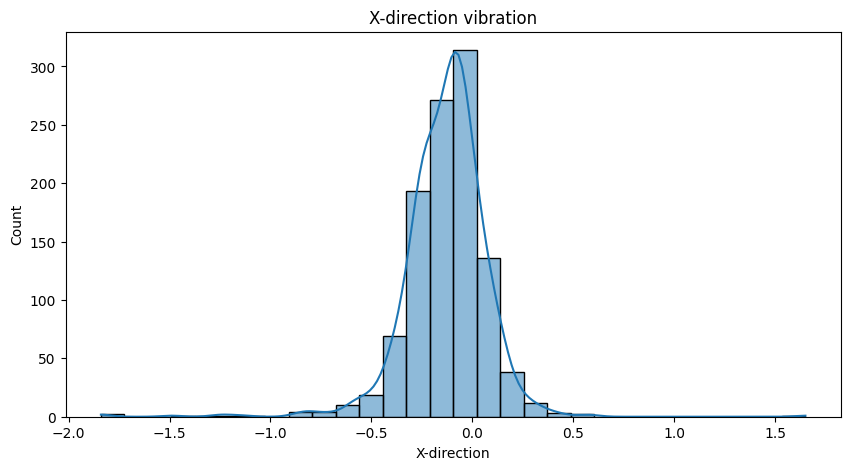

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df['X-direction'], bins=30,kde=True)
plt.title('X-direction vibration')
plt.show()

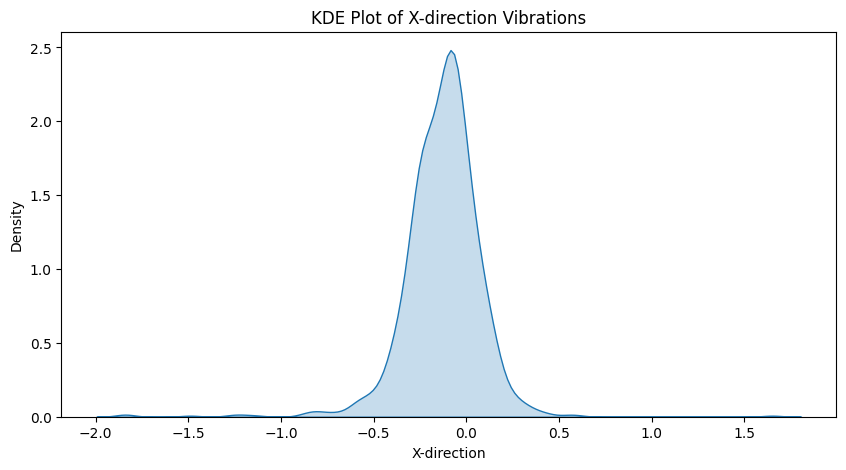

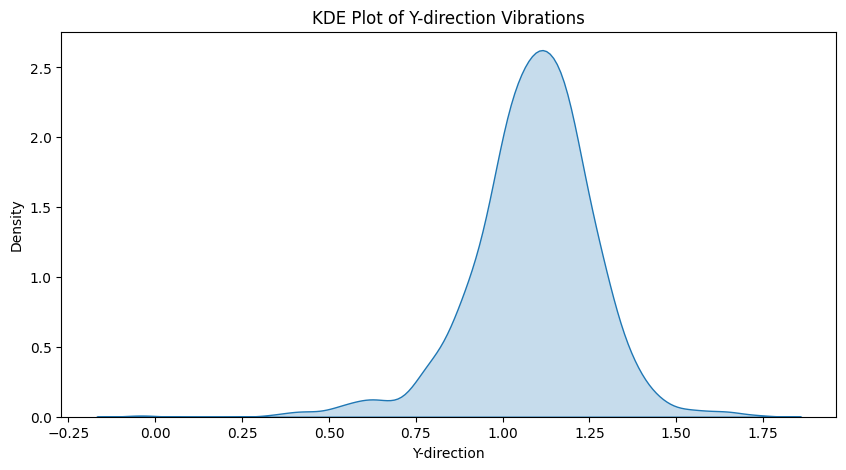

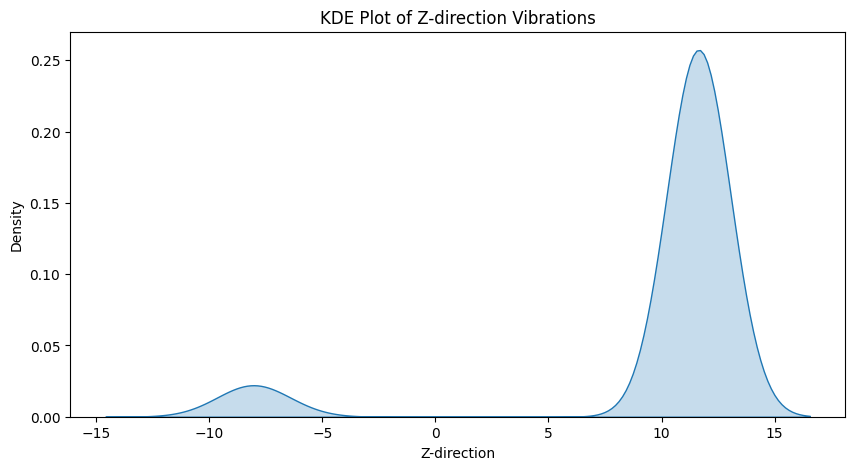

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Import pandas
import os # Import os module

# Load the dataframe if not already loaded
if 'df' not in globals():
    try:
        df = pd.read_csv('ADXL345_SensorData.csv')
    except FileNotFoundError:
        print("Error: ADXL345_SensorData.csv not found. Please upload the file.")
        # You might want to stop execution or handle this error differently
        exit()

# Create the directory to save plots if it doesn't exist
output_dir = "static/images"
os.makedirs(output_dir, exist_ok=True)

plt.figure(figsize=(10, 5))
sns.kdeplot(df['X-direction'], fill=True) # Changed shade to fill
plt.title('KDE Plot of X-direction Vibrations')
plt.xlabel('X-direction')
plt.ylabel('Density')
plt.savefig(os.path.join(output_dir, "kde_x.png")) # Save the X-direction KDE plot
plt.show()

plt.figure(figsize=(10, 5))
sns.kdeplot(df['Y-direction'], fill=True) # Changed shade to fill
plt.title('KDE Plot of Y-direction Vibrations')
plt.xlabel('Y-direction')
plt.ylabel('Density')
plt.savefig(os.path.join(output_dir, "kde_y.png")) # Save the Y-direction KDE plot
plt.show()

plt.figure(figsize=(10, 5))
sns.kdeplot(df['Z-direction'], fill=True) # Changed shade to fill
plt.title('KDE Plot of Z-direction Vibrations')
plt.xlabel('Z-direction')
plt.ylabel('Density')
plt.savefig(os.path.join(output_dir, "kde_z.png")) # Save the Z-direction KDE plot
plt.show()

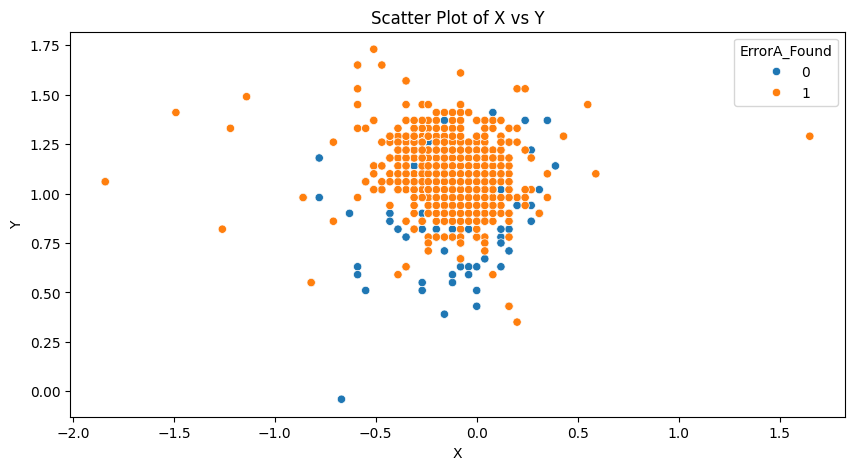

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Import pandas

# Load the dataframe if not already loaded
if 'df' not in globals():
    try:
        df = pd.read_csv('ADXL345_SensorData.csv')
    except FileNotFoundError:
        print("Error: ADXL345_SensorData.csv not found. Please upload the file.")
        # You might want to stop execution or handle this error differently
        exit()

plt.figure(figsize=(10, 5))
sns.scatterplot(x='X-direction', y='Y-direction', hue='ErrorA_Found', data=df)
plt.title('Scatter Plot of X vs Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.savefig("static/images/scatter_xy.png") # Save the scatter plot
plt.show()

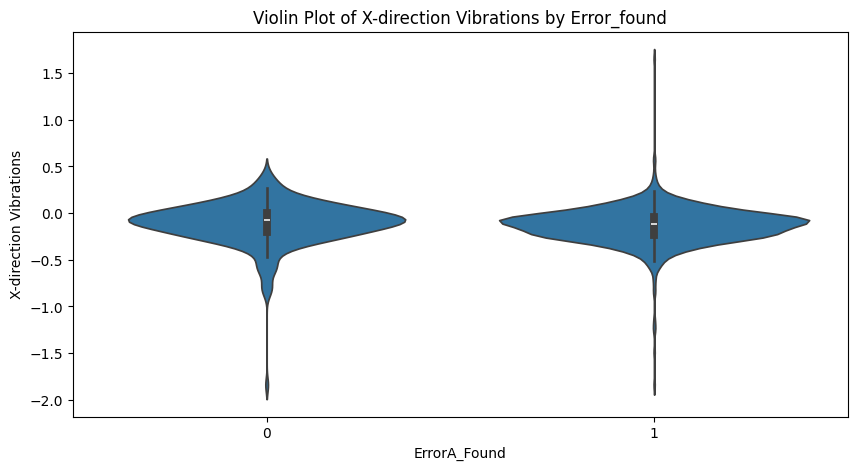

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Import pandas

# Load the dataframe if not already loaded
if 'df' not in globals():
    try:
        df = pd.read_csv('ADXL345_SensorData.csv')
    except FileNotFoundError:
        print("Error: ADXL345_SensorData.csv not found. Please upload the file.")
        # You might want to stop execution or handle this error differently
        exit()

plt.figure(figsize=(10, 5))

sns.violinplot(x='ErrorA_Found', y='X-direction', data=df)
plt.title('Violin Plot of X-direction Vibrations by Error_found')
plt.xlabel('ErrorA_Found')
plt.ylabel('X-direction Vibrations')
plt.savefig("static/images/violin.png") # Save the violin plot
plt.show()

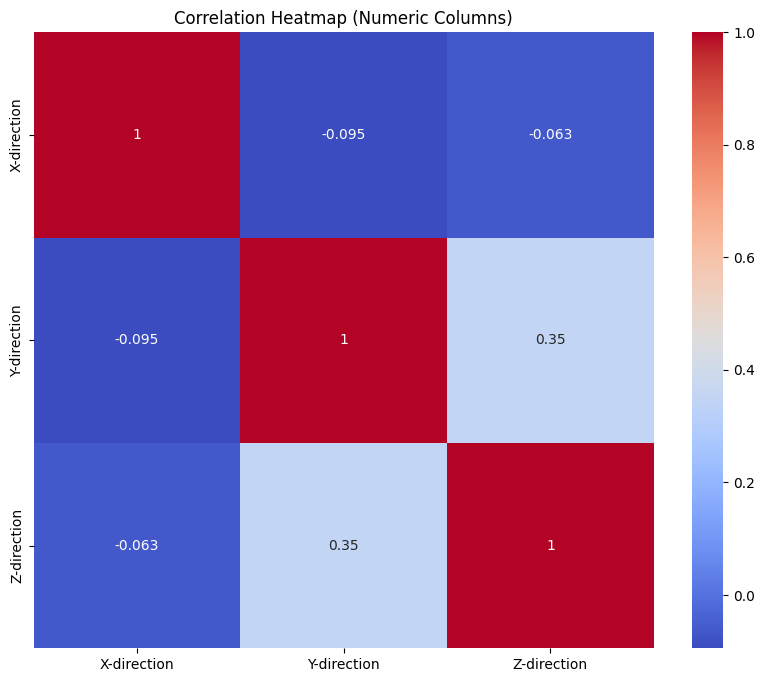

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Import pandas

# Load the dataframe if not already loaded
if 'df' not in globals():
    try:
        df = pd.read_csv('ADXL345_SensorData.csv')
    except FileNotFoundError:
        print("Error: ADXL345_SensorData.csv not found. Please upload the file.")
        # You might want to stop execution or handle this error differently
        exit()

plt.figure(figsize=(10, 8)) # Set the figure size
# Select only numeric columns for correlation calculation
numeric_df = df[['X-direction', 'Y-direction', 'Z-direction']]
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Numeric Columns)')
plt.savefig("static/images/heatmap.png") # Save the heatmap
plt.show()

In [ ]:
X = df[['X-direction', 'Y-direction', 'Z-direction']]
Y = df['ErrorA_Found']

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming 'df' is already defined or loaded.

# The target variable 'ErrorA_Found' is created later, so exclude it here.
X = df[['X-direction', 'Y-direction', 'Z-direction']]
Y = df['ErrorA_Found']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max Scaling
# Apply scaling only to the feature columns 'X', 'Y', and 'Z'
scaled_data = scaler.fit_transform(X)

# Convert back to DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=['X-direction', 'Y-direction', 'Z'])

# Add back the target variable
scaled_df['ErrorA_Found'] = Y.reset_index(drop=True) # Use the original Y to ensure correct index alignment


# Display the scaled data
print("Original Data:")
print(df[['X-direction', 'Y-direction', 'Z-direction', 'ErrorA_Found']])
print("\nScaled Data:")
display(scaled_df)

Original Data:
      X-direction  Y-direction  Z-direction  ErrorA_Found
0            0.31         1.02        -9.18             0
1           -0.78         0.98        -9.10             0
2            0.04         0.67        -8.28             0
3           -0.04         0.90        -8.16             0
4            0.00         1.26        -7.77             0
...           ...          ...          ...           ...
1077        -0.04         1.10        11.49             1
1078        -0.08         1.33        11.65             1
1079        -0.04         1.22        11.96             1
1080        -0.27         1.22        11.77             1
1081         0.12         0.98        11.73             1

[1082 rows x 4 columns]

Scaled Data:


,X-direction,Y-direction,Z,ErrorA_Found
0,0.616046,0.598870,0.053603,0
1,0.303725,0.576271,0.057118,0
2,0.538682,0.401130,0.093146,0
3,0.515759,0.531073,0.098418,0
4,0.527221,0.734463,0.115554,0
...,...,...,...,...
1077,0.515759,0.644068,0.961775,1
1078,0.504298,0.774011,0.968805,1
1079,0.515759,0.711864,0.982425,1
1080,0.449857,0.711864,0.974077,1


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
Y_train.value_counts()

,count
ErrorA_Found,
1,665
0,200


In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
rf = RandomForestClassifier()

param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}

# Calculate the number of folds for GridSearchCV based on the number of samples
# Use min(5, number of samples) to avoid the error when the number of samples is less than 5
cv_folds = min(5, len(X_train))

grid_rf = GridSearchCV(rf, param_grid_rf, cv=cv_folds)
grid_rf.fit(X_train, Y_train)

print("GridSearchCV training complete!")
print(f"Best parameters: {grid_rf.best_params_}")
print(f"Best score: {grid_rf.best_score_}")

GridSearchCV training complete!
Best parameters: {'max_depth': 10, 'n_estimators': 200}
Best score: 0.823121387283237


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = SVC()

param_grid_svc = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_svc = GridSearchCV(svc, param_grid_svc, cv=5)
grid_svc.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']})

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

param_grid_knn = {'n_neighbors': [3, 5, 7], 'weights': ['uniform','distance']}

grid_knn = GridSearchCV(knn, param_grid_knn, cv=5)

grid_knn.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']})

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier()

param_grid_xgb = {'max_depth': [3, 5, 7], 'learning_rate': [0.1, 0.01, 0.001]}
grid_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5)
grid_xgb.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7]})

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

MILESTONE 4


In [ ]:
# Importing all necessary libraries

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")  # To suppress warnings from XGBoost etc.

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluation function
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    print(f"\n----- {model_name} -----")
    print(classification_report(y_test, y_pred))

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    try:
        roc_auc = roc_auc_score(y_test, y_pred)
        print(f"ROC AUC Score: {roc_auc:.4f}")
    except (ValueError, AttributeError):
        print("ROC AUC Score: Not applicable")

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
evaluate_model(log_reg, X_test, y_test, "Logistic Regression")

# Random Forest with GridSearchCV
param_rf = {'n_estimators': [100], 'max_depth': [3, 5, None]}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_rf, cv=3)
grid_rf.fit(X_train, y_train)
evaluate_model(grid_rf.best_estimator_, X_test, y_test, "Random Forest")

# Support Vector Classifier with GridSearchCV
param_svc = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_svc = GridSearchCV(SVC(probability=True), param_svc, cv=3)
grid_svc.fit(X_train, y_train)
evaluate_model(grid_svc.best_estimator_, X_test, y_test, "Support Vector Classifier")

# K-Nearest Neighbors with GridSearchCV
param_knn = {'n_neighbors': [3, 5, 7]}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_knn, cv=3)
grid_knn.fit(X_train, y_train)
evaluate_model(grid_knn.best_estimator_, X_test, y_test, "K-Nearest Neighbors (KNN)")

# XGBoost with GridSearchCV
param_xgb = {'n_estimators': [100], 'max_depth': [3, 5]}
grid_xgb = GridSearchCV(xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'), param_xgb, cv=3)
grid_xgb.fit(X_train, y_train)
evaluate_model(grid_xgb.best_estimator_, X_test, y_test, "XGBoost Classifier")

# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
evaluate_model(nb, X_test, y_test, "Naive Bayes")




----- Logistic Regression -----
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Accuracy: 0.9561
ROC AUC Score: 0.9464

----- Random Forest -----
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Accuracy: 0.9649
ROC AUC Score: 0.9581

----- Support Vector Classifier -----
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    a


----- Logistic Regression -----
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Accuracy: 0.9561
ROC AUC Score: 0.9464

----- Random Forest -----
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Accuracy: 0.9649
ROC AUC Score: 0.9581

----- Support Vector Classifier -----
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    a

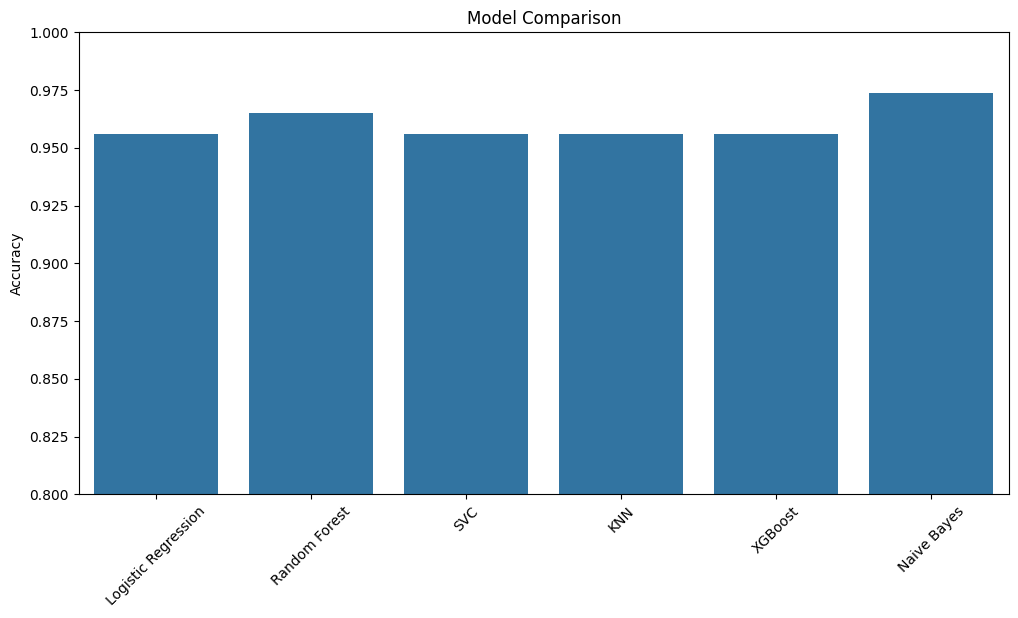

In [ ]:
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    print(f"\n----- {model_name} -----")
    print(classification_report(y_test, y_pred))

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    try:
        roc_auc = roc_auc_score(y_test, y_pred)
        print(f"ROC AUC Score: {roc_auc:.4f}")
    except:
        print("ROC AUC Score: Not applicable")

    return y_pred  # 🔁 return predictions
# Get predictions for each model
y_pred_log_reg = evaluate_model(log_reg, X_test, y_test, "Logistic Regression")
y_pred_rf      = evaluate_model(grid_rf.best_estimator_, X_test, y_test, "Random Forest")
y_pred_svc     = evaluate_model(grid_svc.best_estimator_, X_test, y_test, "Support Vector Classifier")
y_pred_knn     = evaluate_model(grid_knn.best_estimator_, X_test, y_test, "K-Nearest Neighbors")
y_pred_xgb     = evaluate_model(grid_xgb.best_estimator_, X_test, y_test, "XGBoost Classifier")
y_pred_nb      = evaluate_model(nb, X_test, y_test, "Naive Bayes")

print("Model Comparision")
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

models = ['Logistic Regression', 'Random Forest', 'SVC', 'KNN', 'XGBoost', 'Naive Bayes']
accuracies = [
    accuracy_score(y_test, y_pred_log_reg),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_svc),
    accuracy_score(y_test, y_pred_knn),
    accuracy_score(y_test, y_pred_xgb),
    accuracy_score(y_test, y_pred_nb)
]

plt.figure(figsize=(12, 6))
sns.barplot(x=models, y=accuracies)
plt.title('Model Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0.8, 1.0)  # optional: zoom in to focus on high accuracies
plt.show()


In [ ]:
# Suggesting the Best Model
import numpy as np
best_model_index = np.argmax(accuracies)

best_model_name = models[best_model_index]

print(f"The best model is: {best_model_name} with an accuracy of {accuracies[best_model_index]:.2f}")

The best model is: Naive Bayes with an accuracy of 0.97


In [ ]:
# Define X and Y
X = df[['X-direction', 'Y-direction', 'Z-direction']]
Y = df['ErrorA_Found']

In [ ]:
# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# 1) Base model
base_svc = SVC()

# 2) Hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# 3) Instantiate and fit
grid_svc = GridSearchCV(
    estimator=base_svc,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy'
)
# Fit the model using the training data
grid_svc.fit(X_train, Y_train)

# 4) Now this works
svc_model = grid_svc.best_estimator_

# Assign the best trained model to the 'model' variable used for prediction
model = svc_model

# Set seed for reproducibility
np.random.seed(42)

# Inform user about making predictions on the actual test set
print("Making predictions on the actual test set:")

# Use the actual test data X_test and y_test
y_test_actual = Y_test
X_test_actual = X_test

# Predict the labels for the test samples using the trained model
y_test_pred = model.predict(X_test_actual) # Use the updated 'model' variable

# Print the model's predictions and the actual correct answers
print("\nPredictions vs Actual Labels (on test set):")
for i in range(len(y_test_actual)):
    print(f"Sample {i+1}: Prediction = {y_test_pred[i]}, Actual = {y_test_actual.iloc[i]}")

# Calculate and print the accuracy of the model on the test set
accuracy = accuracy_score(y_test_actual, y_test_pred)
print(f"\nModel Accuracy on Test Set: {accuracy * 100:.2f}%")

Making predictions on the actual test set:

Predictions vs Actual Labels (on test set):
Sample 1: Prediction = 0, Actual = 0
Sample 2: Prediction = 1, Actual = 1
Sample 3: Prediction = 1, Actual = 1
Sample 4: Prediction = 1, Actual = 1
Sample 5: Prediction = 0, Actual = 0
Sample 6: Prediction = 1, Actual = 1
Sample 7: Prediction = 1, Actual = 1
Sample 8: Prediction = 1, Actual = 1
Sample 9: Prediction = 0, Actual = 0
Sample 10: Prediction = 1, Actual = 1
Sample 11: Prediction = 1, Actual = 1
Sample 12: Prediction = 1, Actual = 1
Sample 13: Prediction = 1, Actual = 0
Sample 14: Prediction = 1, Actual = 1
Sample 15: Prediction = 1, Actual = 1
Sample 16: Prediction = 1, Actual = 1
Sample 17: Prediction = 1, Actual = 1
Sample 18: Prediction = 1, Actual = 1
Sample 19: Prediction = 1, Actual = 1
Sample 20: Prediction = 1, Actual = 1
Sample 21: Prediction = 1, Actual = 0
Sample 22: Prediction = 1, Actual = 1
Sample 23: Prediction = 1, Actual = 1
Sample 24: Prediction = 1, Actual = 0
Sample 25


MILESTONE 5

In [ ]:
import pickle

pickle.dump(grid_svc,open('printergridsvc.pkl','wb'))
print('Pickle model downloaded successfully')

Pickle model downloaded successfully


In [ ]:
from IPython.core.display import display, HTML

html_code = """
<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Index - Print Guard Bootstrap Template</title>
  <meta name="description">
  <meta name="keywords">
  <link href="static/assets/img/favicon.png" rel="icon">
  <link href="static/assets/img/apple-touch-icon.png" rel="apple-touch-icon">
  <link href="https://fonts.googleapis.com" rel="preconnect">
  <link href="https://fonts.gstatic.com" rel="preconnect" crossorigin>
  <link href="https://fonts.googleapis.com/css2?family=Open+Sans:ital,wght@0,300;0,400;0,500;0,600;0,700;0" rel="stylesheet">
</head>
<body>
  <h1>Hello, HTML inside Colab!</h1>
</body>
</html>
"""

display(HTML(html_code))

In [ ]:
import os
import pickle
from flask import Flask, request, render_template
import numpy as np

In [ ]:
app = Flask(__name__)

# Load the model

with open('printergridsvc.pkl', 'rb') as f:
    model = pickle.load(f)

In [ ]:
@app.route('/')
def home():
  return render_template('index.html')

In [ ]:
!pip install flask-ngrok


In [ ]:
from flask_ngrok import run_with_ngrok
run_with_ngrok(app)


In [ ]:
!pip install flask-ngrok

from flask_ngrok import run_with_ngrok
from flask import Flask, render_template, request
import numpy as np
import pickle
import os

app = Flask(__name__)
run_with_ngrok(app)

In [ ]:
app = Flask(__name__)

# Load your model
# Update with the correct path to your pickled model file
try:
    with open('printergridsvc.pkl', 'rb') as f:
        model = pickle.load(f)
except FileNotFoundError:
    print("Error: printergridsvc.pkl not found. Please ensure the model is pickled correctly.")
    model = None # Set model to None or handle the error appropriately


@app.route('/')
def home():
    return render_template('index.html')


@app.route('/predict', methods=['POST'])
def predict():
    if model is None:
        return render_template('error.html', error="Model not loaded. Please check the server logs.")

    try:
        # Get data from form
        x_direction = float(request.form['x-direction'])
        y_direction = float(request.form['y-direction'])
        z_direction = float(request.form['z-direction'])

        # Make prediction
        input_data = np.array([[x_direction, y_direction, z_direction]])
        prediction = model.predict(input_data)[0]

        # Generate message
        if prediction == 1:
            prediction_message = "Yes, There might be a problem in the 3D Printer. Please check."
        else:
            prediction_message = "No, There is no problem in the 3D Printer. You can continue working."

        # Render result page
        return render_template('results.html', prediction=prediction_message)

    except Exception as e:
        return render_template('error.html', error=str(e))

# To run the app in Colab, you might need flask-ngrok
from flask_ngrok import run_with_ngrok
run_with_ngrok(app)

if __name__ == '__main__':

    # Create a templates directory if it doesn't exist
    if not os.path.exists('templates'):
        os.makedirs('templates')
    # You will need to create index.html, results.html, and error.html in the templates directory
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
Exception in thread Thread-9:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/urllib3/connection.py", line 198, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/usr/local/lib/python3.11/dist-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py", line 787, in urlopen
    response = self._make_request(
            

In [ ]:
import os

# Create templates directory if it doesn't exist
if not os.path.exists('http://127.0.0.1:5000'):
    os.makedirs('http://127.0.0.1:5000')

# Create index.html
with open('http://127.0.0.1:5000/index.html', 'w') as f:
    f.write("""
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>3D Printer Error Prediction</title>
</head>
<body>
    <h1>Predict 3D Printer Errors</h1>
    <form action="/predict" method="post">
        <label for="x-direction">X-direction:</label><br>
        <input type="text" id="x-direction" name="x-direction"><br><br>

        <label for="y-direction">Y-direction:</label><br>
        <input type="text" id="y-direction" name="y-direction"><br><br>

        <label for="z-direction">Z-direction:</label><br>
        <input type="text" id="z-direction" name="z-direction"><br><br>

        <input type="submit" value="Predict">
    </form>
</body>
</html>
""")

# Create results.html
with open('templates/results.html', 'w') as f:
    f.write("""
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Prediction Result</title>
</head>
<body>
    <h1>Prediction Result</h1>
    <p>{{ prediction }}</p>
    <a href="/">Go back</a>
</body>
</html>
""")

# Create error.html
with open('templates/error.html', 'w') as f:
    f.write("""
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Error</title>
</head>
<body>
    <h1>An Error Occurred</h1>
    <p>Details: {{ error }}</p>
    <a href="/">Go back</a>
</body>
</html>
""")

print("HTML template files created in the 'http://127.0.0.1:5000' directory.")

HTML template files created in the 'templates' directory.
